#### <strong>第一次作品：主成分分析實作</strong>
學號：711233115

姓名：許政揚
<hr>

 <font color=skyblue>作品目標</font>：。。。。。。


<font color=red>提醒</font>：每個題目的結構如下：
1. 描述題目（markdown）
1. 說明接下來的程式碼做些甚麼？（markdown）
1. 程式碼（code）
1. 程式執行結果（jupyter output）
1. 對結果的觀察與討論（markdown）

一個題目可能分好幾個細項執行，因此上述步驟 2 到步驟 5 將重複出現。

<hr>

第 1 題：

共變異矩陣(Covariance Matrix)是觀察兩個變數之間關係較常用的統計量。
取前兩欄資料，計算『頭部長度』與『頭部寬度』的樣本共變異矩陣(sample Covariance Matrix)

(1) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

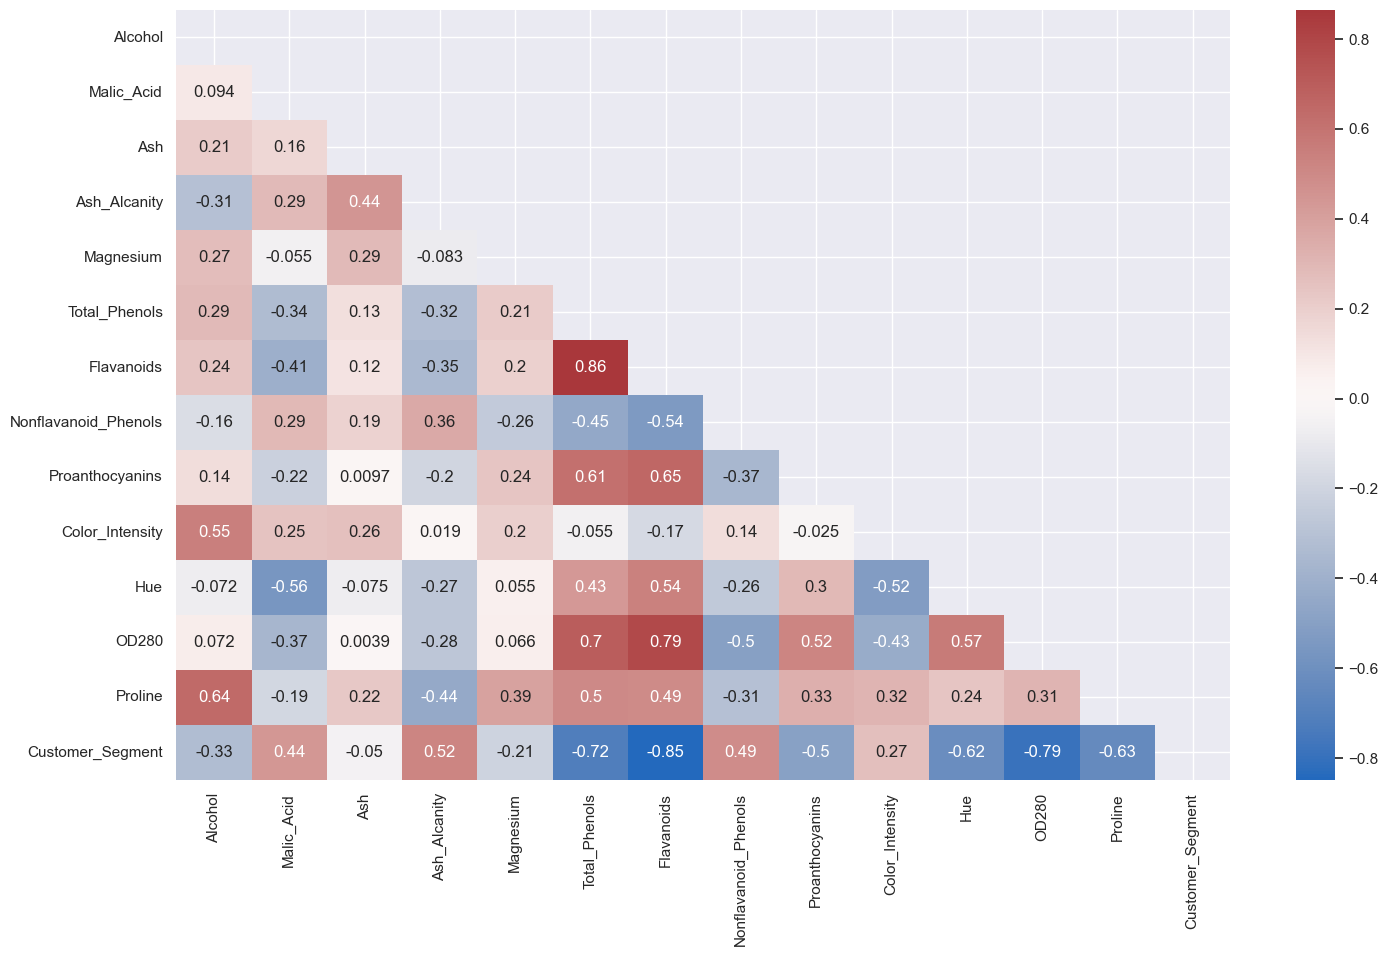

In [65]:
import seaborn 
import pandas as pd
import numpy as np

df = pd.DataFrame(ratings_, columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mas 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')
seaborn.set(rc={'figure.figsize':(17,10)})

**<font color=skyblue>對執行結果的觀察紀錄（if any）：</font>**
- 相關係數矩陣為對稱矩陣，因此僅呈現下半部。
- 。。。

<hr>
第 2 題：

繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

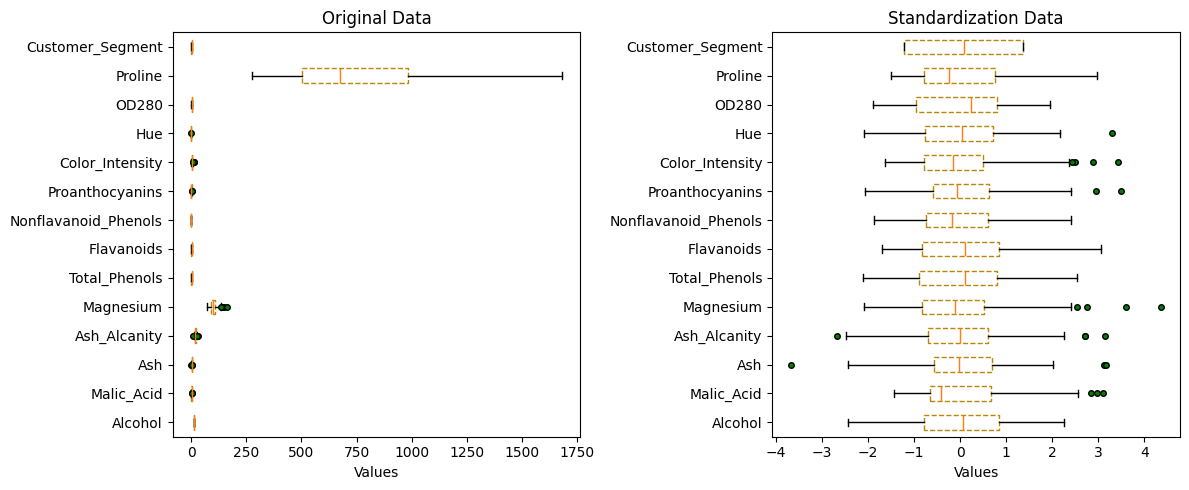

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/Excel_file/wine.xlsx') 
ratings = np.array(df)
categories = df.columns

scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(ratings)
# Apply transform to dataset.
ratings_ = scaler.transform(ratings)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data box plot
axes[0].boxplot(ratings, boxprops=dict(linestyle='--', linewidth=1, color='darkgoldenrod'),
                flierprops=dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none'),
                labels=categories, vert=False)
axes[0].set_xlabel('Values')
axes[0].set_title('Original Data')

# Standardized data box plot
axes[1].boxplot(ratings_, boxprops=dict(linestyle='--', linewidth=1, color='darkgoldenrod'),
                flierprops=dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none'),
                labels=categories, vert=False)
axes[1].set_xlabel('Values')
axes[1].set_title('Standardization Data')

plt.tight_layout()
plt.show()




<hr>
第 3 題：

進行主成分分析，繪製特徵值由大而小的分布與 scree plot

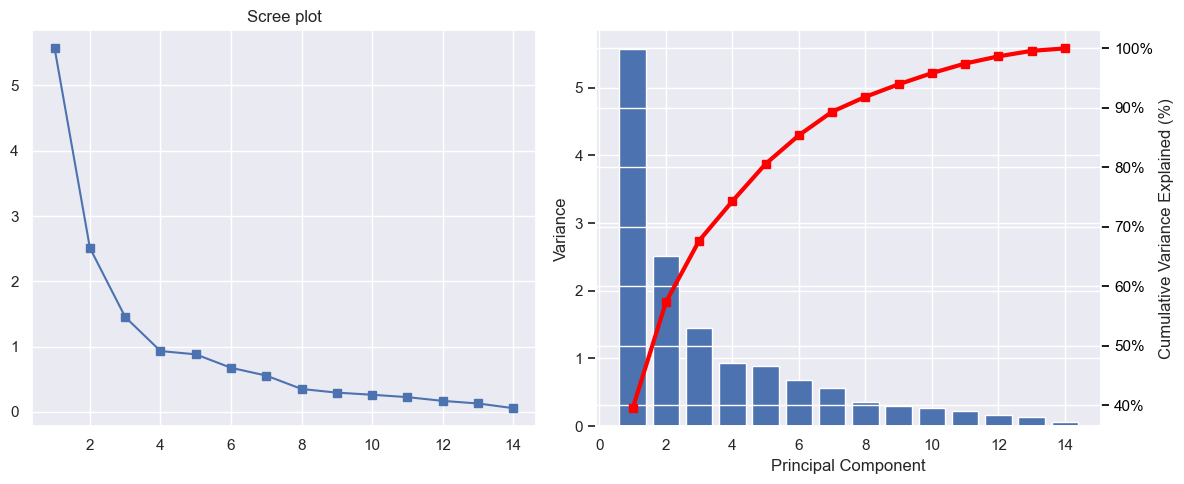

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ratings_ is assumed to be a 329 by 9 data matrix

# Calculate covariance matrix
Sx = np.cov(ratings_.T, bias=False)
N = ratings_.shape[0]
mu_x = ratings_.mean(axis=0)
Tmp = ratings_ - mu_x
Sx_formula = Tmp.T @ Tmp / (N - 1)

# Compute eigenvalues and eigenvectors
w, v = np.linalg.eig(Sx)
idx = np.argsort(-w)  # sort eigenvalues in descending order
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

# Scree plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

x = np.arange(1, 1 + len(eigvals))
axes[0].plot(x, eigvals, marker='s')
axes[0].set_title('Scree plot')
axes[0].grid(True)

# Bar plot with cumulative variance explained
axes[1].bar(x, eigvals)
axes2 = axes[1].twinx()
axes2.plot(x, eigvals.cumsum() / eigvals.sum() * 100, marker='s', color='red', lw=3)
axes2.tick_params(axis='y', colors='black')
axes2.yaxis.set_major_formatter(PercentFormatter())
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Variance')
axes2.set_ylabel('Cumulative Variance Explained (%)')

plt.tight_layout()
plt.show()


<hr>
第 4 題：

資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別

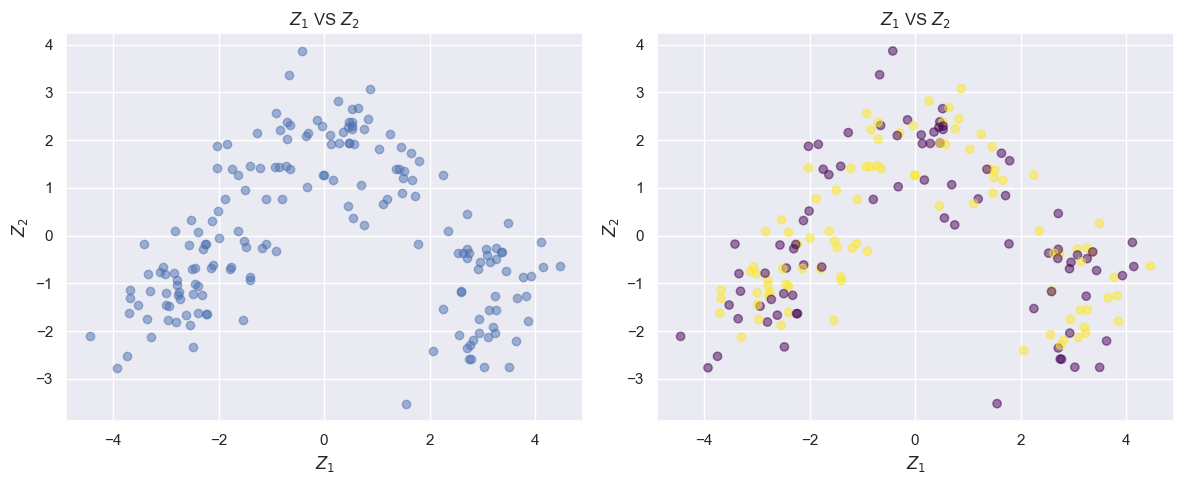

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming ratings_ is your data matrix
# Assuming labels is your vector of labels for each data point

# Generate random labels for demonstration purpose
np.random.seed(0)
labels = np.random.randint(0, 2, size=ratings_.shape[0])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(ratings_)

# Extract the first two principal components
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

# Scatter plot of the first two principal components with color-coded labels
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first subplot
axes[1].scatter(pc1, pc2, c=labels, cmap='viridis', alpha=0.5)
axes[1].set_title('$Z_1$ VS $Z_2$')
axes[1].set_xlabel('$Z_1$')
axes[1].set_ylabel('$Z_2$')
axes[1].grid(True)

# Scatter plot for the second subplot
axes[0].scatter(pc1, pc2, alpha=0.5)
axes[0].set_title('$Z_1$ VS $Z_2$')
axes[0].set_xlabel('$Z_1$')
axes[0].set_ylabel('$Z_2$')
axes[0].grid(True)

plt.tight_layout()
plt.show()


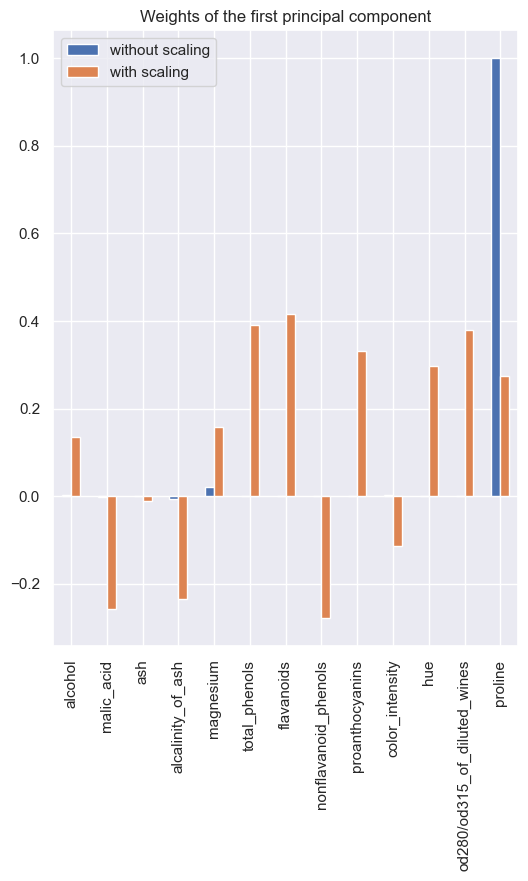

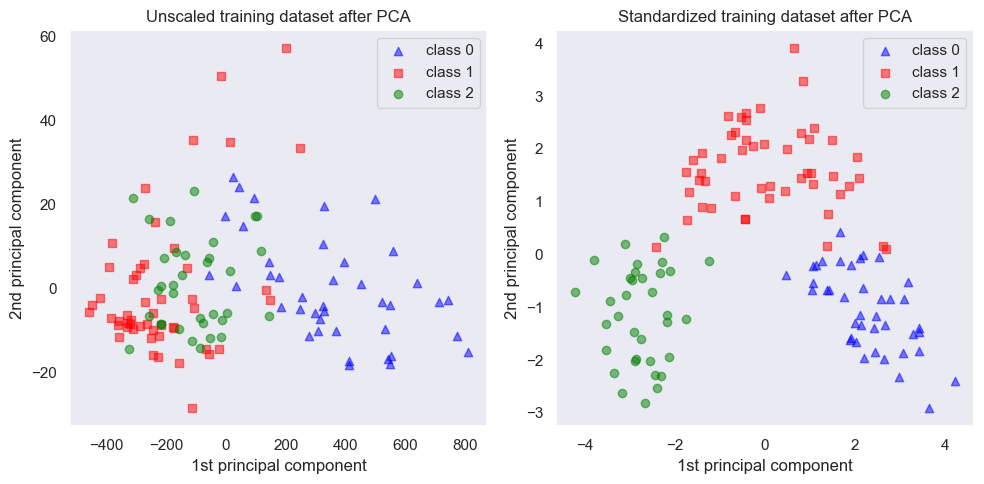

In [73]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pandas as pd

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)


# Assuming ratings_ is your data matrix
# Assuming labels is your vector of labels for each data point
# Assuming X_train_transformed, X_train_std_transformed, y_train are defined

# Generate random labels for demonstration purpose
np.random.seed(0)
labels = np.random.randint(0, 2, size=ratings_.shape[0])

# Perform PCA on your data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_transformed)
X_train_std_pca = pca.fit_transform(X_train_std_transformed)

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_pca[y_train == target_class, 0],
        y=X_train_pca[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_pca[y_train == target_class, 0],
        y=X_train_std_pca[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()
plt.show()
